<a href="https://colab.research.google.com/github/farhan1503001/GRIP-TASK-2/blob/main/Prediction_Using_Unsupervised_Learning_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taks-2: Prediction of optimum number of clusters for Iris Dataset


> **The Sparks Foundation-Graduate Rotational Internship Programme(Batch-July(2021)**



> **Data Science and Business Analytics Internship**



> **Submitted By: Mohd.Farhan Israk Soumik**



***

> **Importing Required Libraries**



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import sklearn as sk



> **Importing Dataset**

> Here I am accessing Iris dataset from pandas.





In [ ]:
iris_dataset=load_iris()
dataset=pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Observation Regarding Dataset**



> **Statistical Summary**



In [ ]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Finding the correlation between different features**

In [ ]:
dataset.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Observation: Sepal length has strong postive correlation with petal length and width.**
**Meanwhile sepal width possesses negative correlation with all other features.** **Petal length possesses very high correlation with sepal length and petal width. Meanwhile, positive correlation between petal length and width is easily noticable.**



> **Finding Nonzero elements**



In [ ]:
dataset.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Observation: So there is no missing values in the dataset**

# **Visualization of Dataset**


> **Visualization with Principal Component Analysis:**
**Here we will create two compound features using existing features of the dataset and then visualize 2D graph**



In [ ]:
temp_vis_data=dataset.iloc[:,:-1].values

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=0)
temp_view=pca.fit_transform(temp_vis_data)
print("Covariance: ",pca.get_covariance())
print("Explained Variance Ratio: ",pca.explained_variance_ratio_)

Covariance:  [[ 0.68569351 -0.042434    1.27431544]
 [-0.042434    0.18997942 -0.32965638]
 [ 1.27431544 -0.32965638  3.11627785]]
Explained Variance Ratio:  [0.92464061 0.06046599]


**observing pca-tranform dataset**

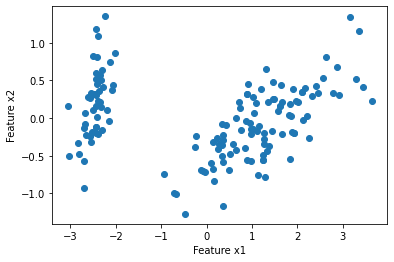

In [ ]:
plt.scatter(temp_view[:,0],temp_view[:,1])
plt.xlabel('Feature x1')
plt.ylabel("Feature x2")
plt.show()

**Observation: we can cluster this pca transformed dataset with only two/three clusters quite easily**



> **Pairwise Feature Visualization:**

**Here we will use try to create all possible pair of feature(sepal width,sepal length).. and visualize them instead of pca-transformed visualization**



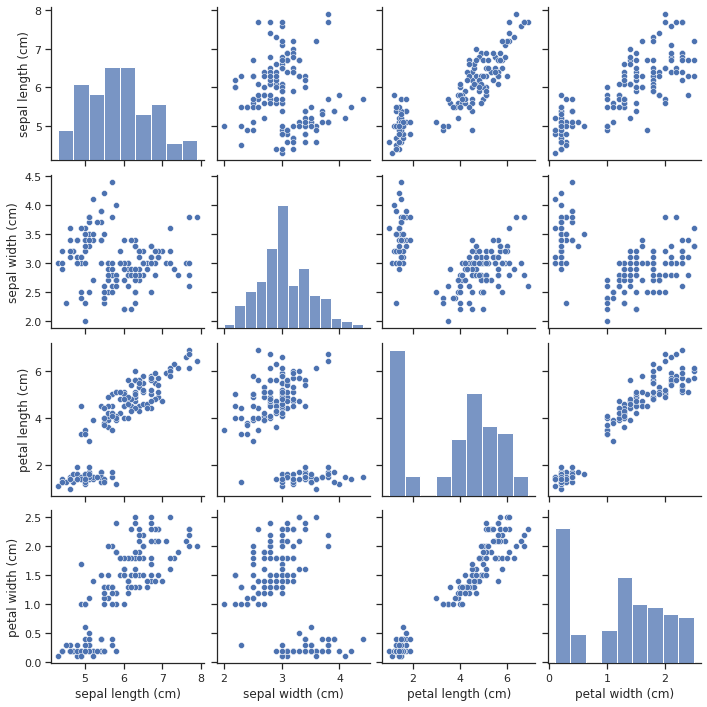

In [ ]:
import seaborn as sns
sns.set(style='ticks',color_codes=True)
graph=sns.pairplot(dataset)
plt.show()

**observation:Here we can see that most of the feature pair plot can be clustered using 2/3 clusters more precisely not more than 3 clusters**

# **Unsupervised Learning Application Section**

> **K-Means Clustering**



**We will use elbow method to find optimum clusters for cluster range(1-12)**

In [ ]:
cluster_number=[x for x in range(1,12)]
processed_data=dataset.iloc[:,:4].values
processed_data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
inertias=list()
from sklearn.cluster import KMeans
for i in cluster_number:
  clusterer=KMeans(n_clusters=i,max_iter=500)
  clusterer.fit(processed_data)
  inertias.append(clusterer.inertia_)#Using inertia

  

**Visualization of Cluster vs Inertia graph**

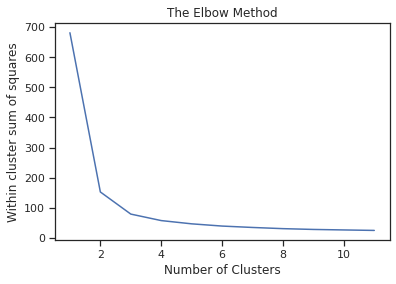

In [ ]:
plt.plot(cluster_number,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel("Within cluster sum of squares")
plt.title("The Elbow Method")
plt.show()

**The graph shape defines why the graph is called Elbow method graph.Here there are two elbows in the graph for cluster 2 and cluster 3. The optimum number of cluster is the elbow point after which curve flattens so it is 3**

In [ ]:
final_cluster=KMeans(n_clusters=3,init='k-means++',max_iter=500)
k_means_result=final_cluster.fit_predict(processed_data)

In [ ]:
k_means_result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# **3-Cluster Points Visualization**

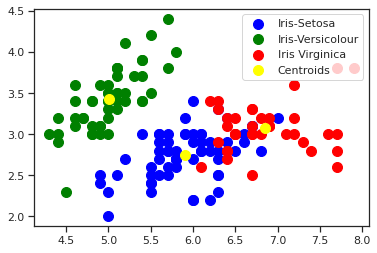

In [ ]:
plt.scatter(processed_data[k_means_result==0,0],processed_data[k_means_result==0,1],s=100,c='blue',label='Iris-Setosa')
plt.scatter(processed_data[k_means_result==1,0],processed_data[k_means_result==1,1],s=100,c='green',label='Iris-Versicolour')
plt.scatter(processed_data[k_means_result==2,0],processed_data[k_means_result==2,1],s=100,c='red',label='Iris Virginica')
plt.scatter(final_cluster.cluster_centers_[:,0],final_cluster.cluster_centers_[:,1],c='yellow',s=100,label='Centroids')
plt.legend()
plt.show()

# **The optimum number of class is 3 and I have visualized the clustering of each element of the dataset.**
**Thanks**